In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the dataset



In [2]:
honeypro=pd.read_csv("honeyproduction1998-2016 (1).csv")

In [3]:
#View few rows of data
honeypro.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
#Check the shape of data
honeypro.shape

(785, 8)

In [6]:
#check the datatype of variable
honeypro.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

obervation:
- 1:State is the Object data type
- 2:year is integer type currently. Since year is a categorical variable here, let us convert it to category data data type in Python.
- 3:All the other variables are numerical and there for their python data types (float64 and int64) are ok.

In [10]:
#to convert year into category
honeypro.year=honeypro.year.astype("category")

# Let us analyse the quantitative variables in the dataset

In [13]:
honeypro.describe().T

,count,mean,std,min,25%,50%,75%,max
numcol,785.0,6.168662e+04,9.274894e+04,2000.00,9000.00,26000.00,65000.00,510000.00
yieldpercol,785.0,6.057834e+01,1.942783e+01,19.00,46.00,58.00,72.00,136.00
totalprod,785.0,4.140957e+06,6.884594e+06,84000.00,470000.00,1500000.00,4096000.00,46410000.00
stocks,785.0,1.257629e+06,2.211794e+06,8000.00,119000.00,391000.00,1380000.00,13800000.00
priceperlb,785.0,1.695159e+00,9.306234e-01,0.49,1.05,1.48,2.04,7.09
prodvalue,785.0,5.489739e+06,9.425394e+06,162000.00,901000.00,2112000.00,5559000.00,83859000.00


Observations:

- Number of colonies in every state are spread over a huge range. Ranging from 2000 to 510000.

- The mean numcol is close to the 75% percentile of the data, indicating a right skew.

- As expected, standard deviation of numcol is very high

- yieldpercol - Yield per colony also has huge spread ranging from 19 pounds to 136 pounds.

- Infact, all the variable seem to have a huge range, we will have to investigate furthur if this spread is mainly across different states or varies in the same state over the years.



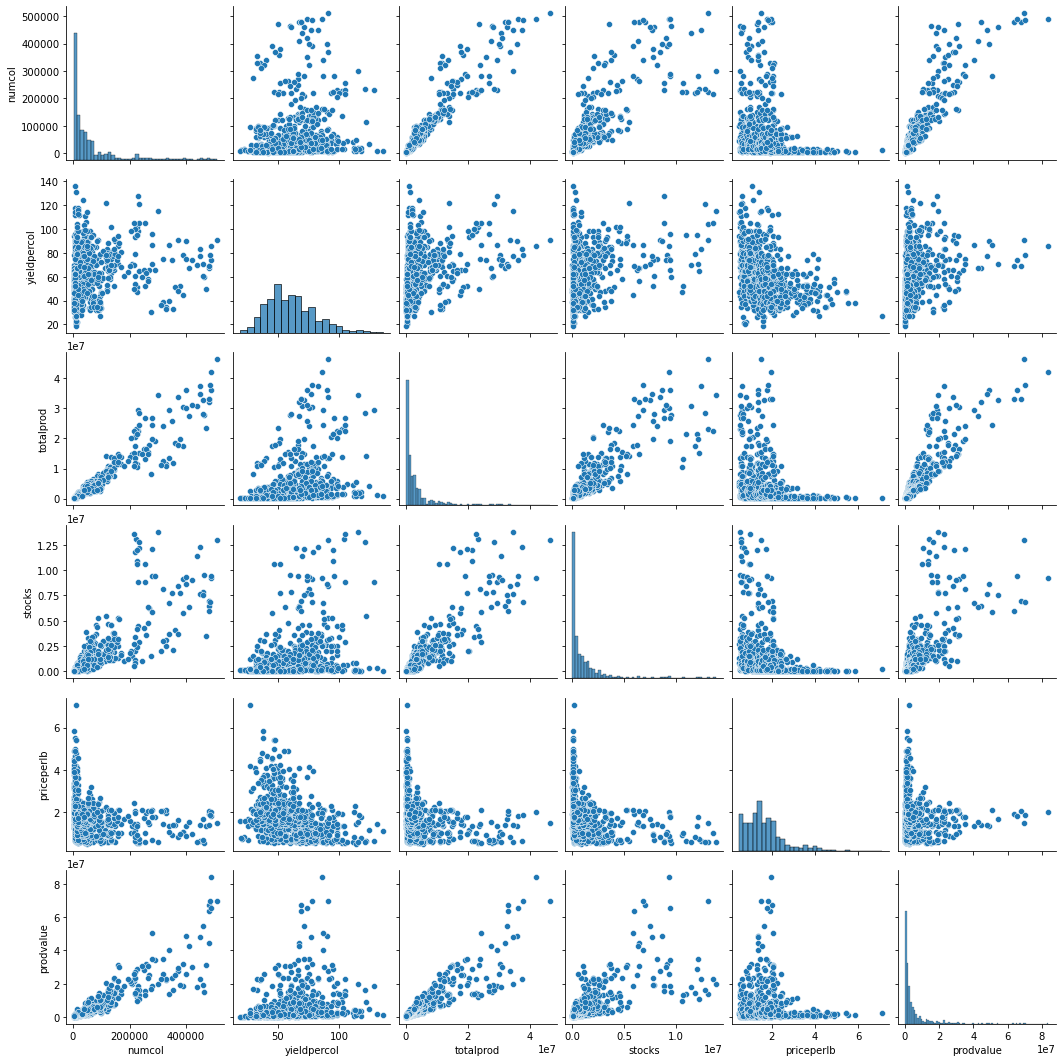

In [14]:
sns.pairplot(honeypro)

In [16]:
corelation=honeypro.corr()
corelation

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.224539,0.951822,0.820076,-0.211427,0.898989
yieldpercol,0.224539,1.000000,0.382945,0.358676,-0.360571,0.255789
totalprod,0.951822,0.382945,1.000000,0.876872,-0.239085,0.895242
stocks,0.820076,0.358676,0.876872,1.000000,-0.275926,0.713161
priceperlb,-0.211427,-0.360571,-0.239085,-0.275926,1.000000,-0.061833
prodvalue,0.898989,0.255789,0.895242,0.713161,-0.061833,1.000000


<AxesSubplot:>

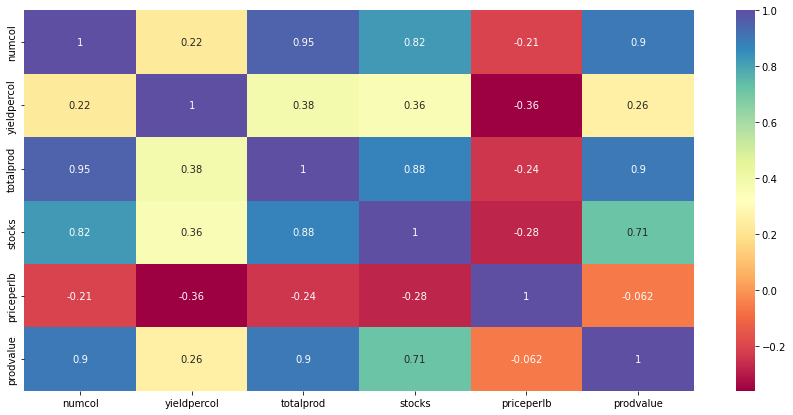

In [24]:
plt.figure(figsize=(15,7))
sns.heatmap(corelation,annot=True,cmap='Spectral')

Observations:

- Number of colonies have a high positive correlation with total production, stocks and the value of production. As expected, all these values are highly correlated with each other.

- Yield per colony does not have a high correlation with any of the features that we have in our dataset.

- Same is the case with priceperlb.

- Determining the factors influencing per colony yield and price per pound of honey would need furthur investigation.

# Let us now explore the categorical features - state and year

In [30]:
print(honeypro.state.nunique())
print(honeypro.year.nunique())

44
19


We have honey production data for 44 US states over a span of 19 years, from 1998 to 2016.

# Let us look at the overall trend of honey production in the US over the years



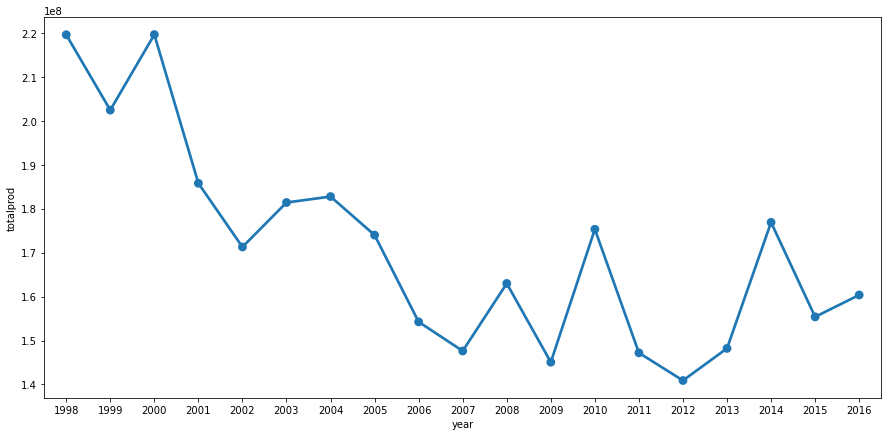

In [41]:
plt.figure(figsize=(15,7))
sns.pointplot(x="year",y="totalprod",data=honeypro,estimator=sum,ci=None)
#plt.xticks(rotation=90) 
plt.show()

Observation:
  - 1: Total overall honey bee production decreasing over the year
  - 2: Total honey production=number of colonoies*average yield per colony.Let us check if the honey production is decreasing due to one of of these factors

# Variation in the number of colonies over the years



<AxesSubplot:xlabel='year', ylabel='numcol'>

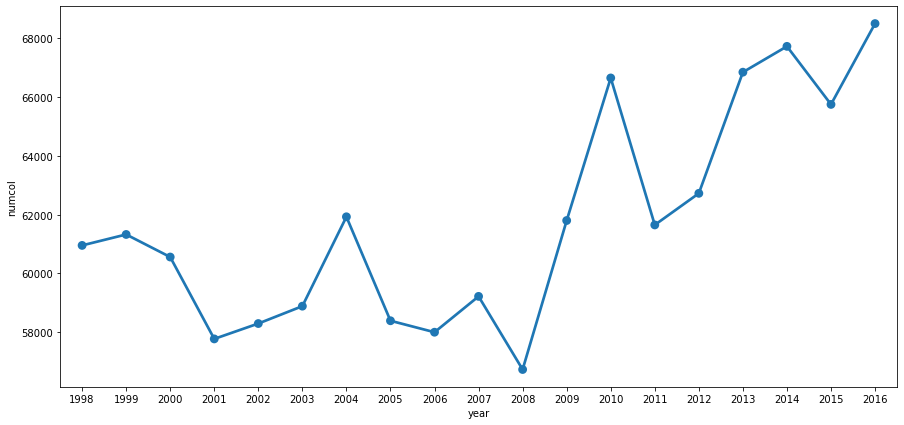

In [44]:
plt.figure(figsize=(15,7))
sns.pointplot(x="year",y='numcol',data=honeypro,ci=None)

Observations:

- The number of colonies across the country shows a declining trend from 1998-2008 but has seen an uptick since 2008.

- It is possible that there was some intervension in 2008 that help in increasing the number of honey bee colonies across the country.



# Variation of yield per colony over the years



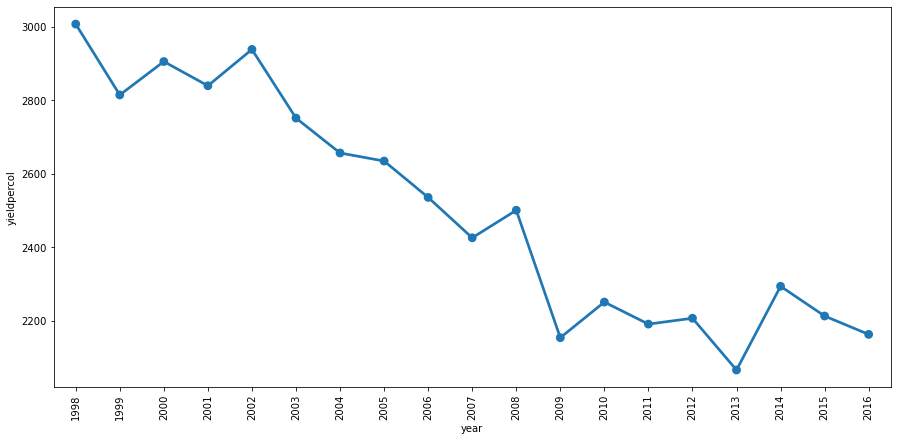

In [46]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='yieldpercol', data=honeypro, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observation:
- In contrast to number of colonies, the yield per colony has been decreasing since 1998.
- This indicates that, it is not the number of colonies that is causing a decline in totalhoney production but the yield per colony.


# Let us look at the production trend at state level

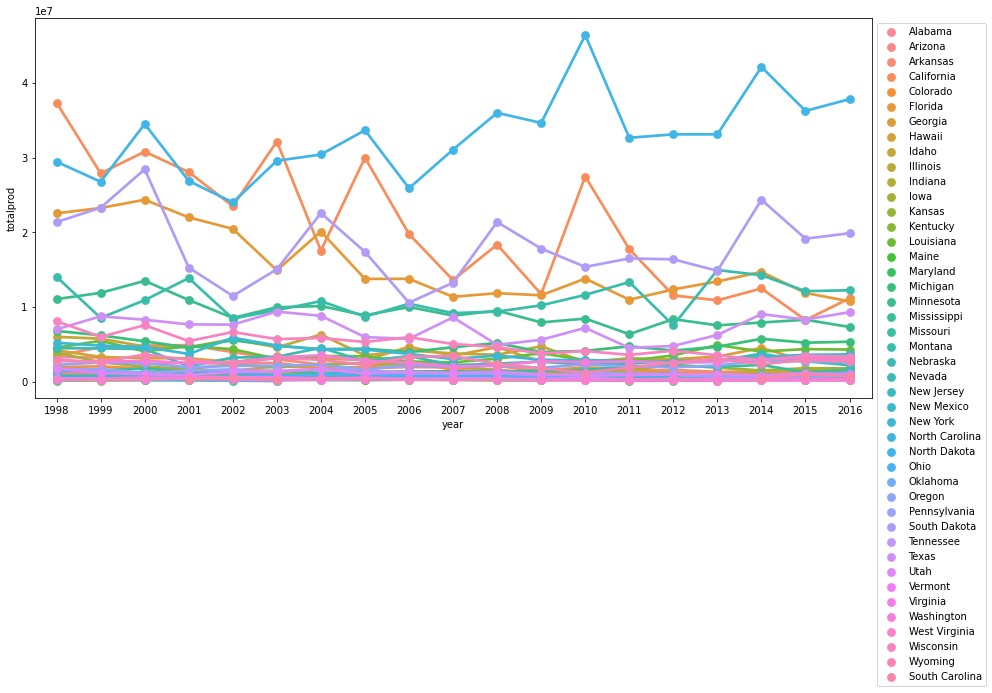

In [49]:
plt.figure(figsize=(15,7))
sns.pointplot(x="year",y="totalprod",data=honeypro,hue="state",ci=None,estimator=sum)
plt.legend(bbox_to_anchor=(1,1))

Observations: There are some states that have much higher productions than the others but this plot is a little hard to read. Let us try plotting each state seperatly for a better understanding.



# Catplot